In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

from collections import Counter

# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
df1 = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df1.dataframeName = 'heart_disease_health_indicators_BRFSS2015.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 253680 rows and 22 columns


In [ ]:
df1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
X = df1.drop(['HeartDiseaseorAttack'], axis=1)
y = df1['HeartDiseaseorAttack']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
sampler=SMOTE()
X_train,y_train=sampler.fit_resample(X_train,y_train)

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(y_pred)
# print(accuracy_score(y_test,y_pred))
# print(mean_squared_error(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# features = ['HighBP', 'HighChol', 'Age', 'GenHlth', 'Sex']
# X = df1[features]
# y = df1['HeartDiseaseorAttack']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
# print(list(y_pred))
# print(accuracy_score(y_test,y_pred))
# print(mean_squared_error(y_test,y_pred))

In [ ]:
gnb = GaussianNB().fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.7304872280037843
0.2695127719962157


In [ ]:
km = KMeans(n_clusters=2,random_state=42).fit(X_train,y_train)
y_pred = km.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8388783769578472
0.16112162304215286


In [ ]:
rfc = RandomForestClassifier(random_state=0).fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9007936507936508
0.0992063492063492


In [ ]:
feature_names = list(X.columns)
imp = [i[0] for i in sorted(list(zip(rfc.feature_importances_,feature_names)),reverse=True)]
ind = [i[1] for i in sorted(list(zip(rfc.feature_importances_,feature_names)),reverse=True)]

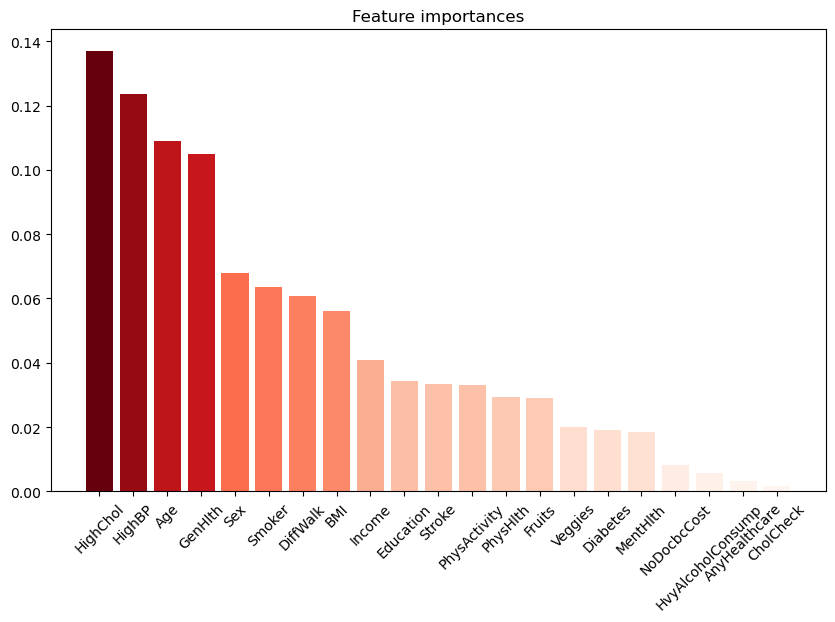

<Figure size 2000x1000 with 0 Axes>

In [ ]:
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(ind,imp,color=my_cmap(rescale(imp)), align="center")
plt.xticks(ind,rotation=45)
plt.figure(figsize=(20,10))
plt.show();

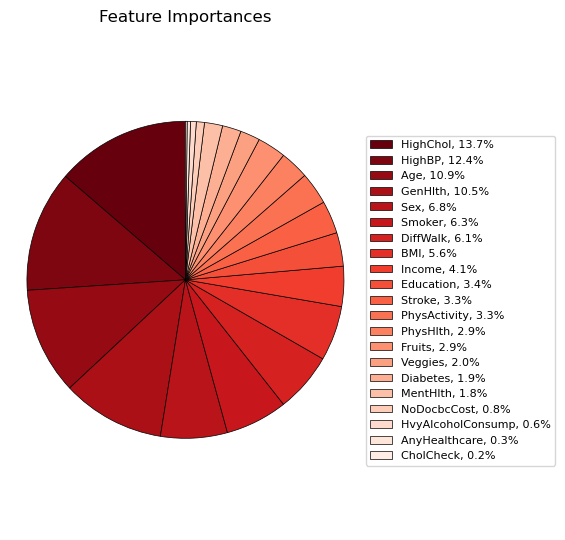

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('Reds_r')
ax1.set_prop_cycle("color", [theme(1. * i / len(ind))
                             for i in range(len(ind))])
 
_, _ = ax1.pie(imp, startangle=90, radius=1800, wedgeprops={'linewidth': 0.5, 'linestyle': 'solid', "edgecolor":"k"})
 
ax1.axis('equal')
 
total = sum(imp)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(ind, imp)],
    prop={'size': 8},
    bbox_to_anchor=(1, 0.8),
    bbox_transform=fig1.transFigure
)
plt.title('Feature Importances')
plt.show()

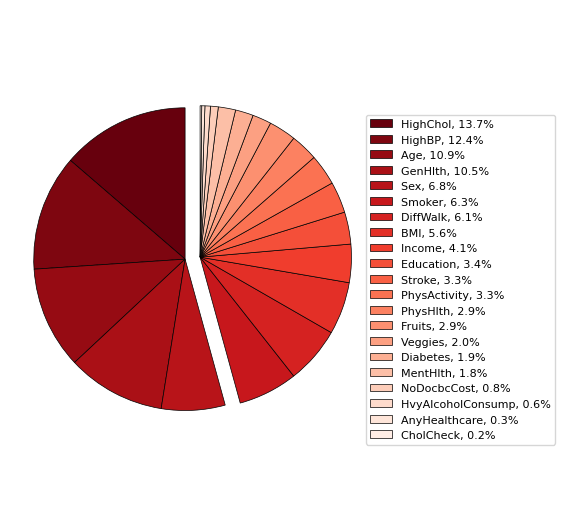

In [ ]:
import numpy as np
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
theme = plt.get_cmap('Reds_r')
ax1.set_prop_cycle("color", [theme(1. * i / len(ind))
                             for i in range(len(ind))])
myexplode = [0.1]*5 + [0]*16
wedges, percs = ax1.pie(imp, startangle=90, wedgeprops={'linewidth': 0.5, 'linestyle': 'solid', "edgecolor":"k"}, explode = myexplode)

groups = [[0, 1, 2, 3, 4], [5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
radfraction = 0.05
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)
        

total = sum(imp)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(ind, imp)],
    prop={'size': 8},
    bbox_to_anchor=(1, 0.8),
    bbox_transform=fig1.transFigure
)
ax1.axis('equal')
plt.show()